# Upsampling of 1000 Hz Sine #
<p>Display of sinusoidal waveform using a stem plot. Upsampling by insertion of zeros
  and interpolation using a sinc function.</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
fsz = (7,5)  # figure size
fsz2 = (fsz[0],fsz[1]/2.0)  # half high figure

In [3]:
# initial parameters
Fs = 8000   # sampling rate
fm = 1000   # frequency of svinusoid
tlen = 1.0  # length in seconds

In [4]:
# generate time axis
tt = np.arange(np.round(tlen*Fs))/float(Fs)
# generate sine
xt = np.sin(2*np.pi*fm*tt)

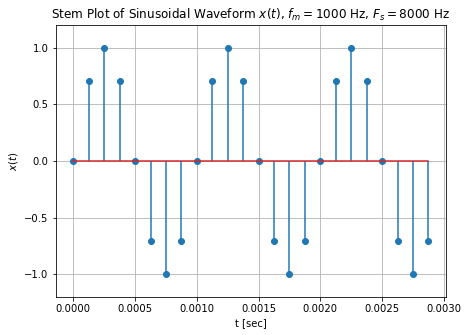

In [5]:
# make stem plot
plt.figure(1, figsize=fsz)
plt.stem(tt[:24], xt[:24], use_line_collection = True)
plt.ylim([-1.2, 1.2])
plt.ylabel('$x(t)$')
plt.xlabel('t [sec]')
strt1 = 'Stem Plot of Sinusoidal Waveform $x(t)$'
strt1 = strt1 + ', $f_m={}$ Hz, $F_s={}$ Hz'.format(fm, Fs)
plt.title(strt1)
plt.grid()
# plt.savefig('sine1000_Fs8000.eps')

In [6]:
N = 3   # upsampling factor
xNt = np.vstack((xt, np.zeros((N-1, xt.size))))  # expand N times
xNt = np.reshape(xNt, -1, order='F')   # reshape into array
print(xNt[:24])   # check readout order

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  7.07106781e-01
  0.00000000e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
  0.00000000e+00  7.07106781e-01  0.00000000e+00  0.00000000e+00
  1.22464680e-16  0.00000000e+00  0.00000000e+00 -7.07106781e-01
  0.00000000e+00  0.00000000e+00 -1.00000000e+00  0.00000000e+00
  0.00000000e+00 -7.07106781e-01  0.00000000e+00  0.00000000e+00]


In [7]:
my_xNt = np.zeros(shape = (xt.size * N, ), dtype = np.float64)

In [8]:
my_xNt[::N] = xt

In [9]:
np.array_equal(xNt, my_xNt)

True

In [10]:
np.sum(np.abs(xNt - my_xNt))

0.0

In [11]:
FsN = N*Fs  # new sampling rate
ttN = np.arange(xNt.size)/float(FsN)  # new time axis

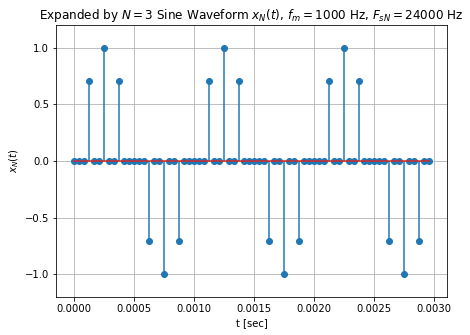

In [12]:
# new stem plot
plt.figure(2, figsize=fsz)
plt.stem(ttN[:N*24], xNt[:N*24], use_line_collection = True)
plt.ylim([-1.2, 1.2])
plt.ylabel('$x_N(t)$')
plt.xlabel('t [sec]')
strt2 = 'Expanded by $N={}$ Sine Waveform $x_N(t)$'.format(N)
strt2 = strt2 + ', $f_m={}$ Hz, $F_{{sN}}={}$ Hz'.format(fm, FsN)
plt.title(strt2)
plt.grid()
# plt.savefig('sine1000xp3_Fs24000.eps')

In [13]:
def sinc_ipol(Fs, fL, k):
    """
    sinc interpolation function, cutoff frequency fL,
    taillength k/(2*fL) seconds
    >>>>> tth, ht = sinc_ipol(Fs, fL, k) <<<<<
    where Fs    sampling rate
          fL    cutoff frequency in Hz
          k     taillength in terms of zero crossings of sinc
          tth   time axis for h(t)
          ht    truncated sinc pulse h(t)
    """
    # create time axis
    ixk = int(np.round(Fs*k/float(2*fL)))
    tth = np.arange(-ixk, ixk+1)/float(Fs)
    # sinc pulse
    ht = 2*fL*np.sinc(2*fL*tth)
    return tth, ht

In [14]:
np.arange(-3, 4)

array([-3, -2, -1,  0,  1,  2,  3])

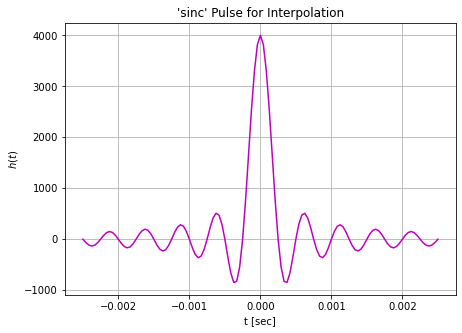

In [15]:
# esse fL deve ser maior que fMAX, mas tem que bloquear os aliases
# plot of interpolation waveform
fL = 2000   # cutoff frequency
k = 10  # sinc pulse truncation
tth, ht = sinc_ipol(FsN, fL, k)
plt.figure(3, figsize=fsz)
plt.plot(tth, ht, '-m')
plt.ylabel('$h(t)$')
plt.xlabel('t [sec]')
strt3 = "'sinc' Pulse for Interpolation"
# strt3 = strt3 + ', $F_s={}$ Hz, $f_L={}$ Hz, $k={}$'.format(FsN, fL, k)
plt.title(strt3)
plt.grid()
# plt.savefig('sinc_ipol_fL3000')

In [16]:
# convolve expanded sine sequence with interpolation waveform to
# obtain upsampled (by factor N) sequence yNt with sampling rate FsN
yNt = np.convolve(xNt, ht, 'same')/float(Fs)

In [17]:
yNt

array([ 0.14082328,  0.291365  ,  0.46310398, ..., -0.6378078 ,
       -0.46310398, -0.291365  ])

In [18]:
np.convolve(xNt, ht / float(Fs), 'same')

array([ 0.14082328,  0.291365  ,  0.46310398, ..., -0.6378078 ,
       -0.46310398, -0.291365  ])

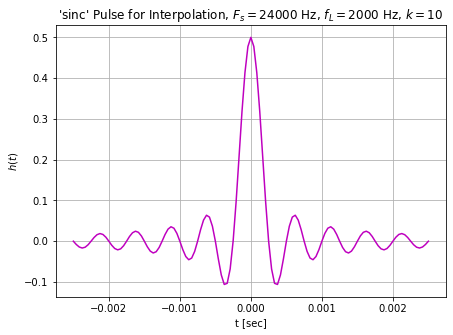

In [19]:
tth, ht = sinc_ipol(FsN, fL, k)

ht /= float(Fs)
plt.figure(3, figsize=fsz)
plt.plot(tth, ht, '-m')
plt.ylabel('$h(t)$')
plt.xlabel('t [sec]')
strt3 = "'sinc' Pulse for Interpolation"
strt3 = strt3 + ', $F_s={}$ Hz, $f_L={}$ Hz, $k={}$'.format(FsN, fL, k)
plt.title(strt3)
plt.grid()
# plt.savefig('sinc_ipol_fL3000')

8000
24000


([<matplotlib.axis.XTick at 0x7fdd1158cad0>,
 <a list of 2 Text major ticklabel objects>)

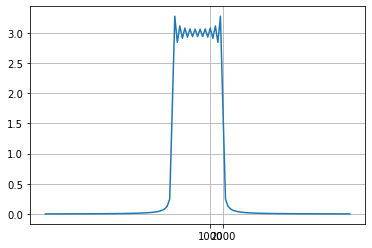

In [20]:
print(Fs)
print(FsN)
freq = np.fft.fftfreq(ht.size, d = 1 / (FsN))
freq = np.fft.fftshift(freq)
plt.plot(freq, np.fft.fftshift(np.abs(np.fft.fft(ht))))
plt.grid()
plt.xticks([1000, 2000])

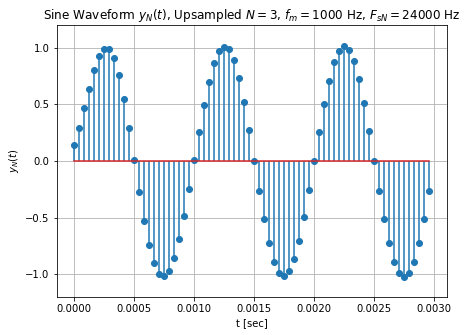

In [21]:
# stem plot of upsampled sequence
plt.figure(4, figsize=fsz)
plt.stem(ttN[:N*24], yNt[:N*24], use_line_collection = True)
plt.ylim([-1.2, 1.2])
plt.ylabel('$y_N(t)$')
plt.xlabel('t [sec]')
strt4 = 'Sine Waveform $y_N(t)$, Upsampled $N={}$'.format(N)
strt4 = strt4 + ', $f_m={}$ Hz, $F_{{sN}}={}$ Hz'.format(fm, FsN)
plt.title(strt4)
plt.grid()
# plt.savefig('sine1000_Fs24000.eps')

In [22]:
# initial parameters
Fs = 8000 * N   # sampling rate
fm = 1000   # frequency of sinusoid
tlen = 1.0  # length in seconds

In [23]:
# generate time axis
tt = np.arange(np.round(tlen*Fs))/float(Fs)
# generate sine
xt = np.sin(2*np.pi*fm*tt)

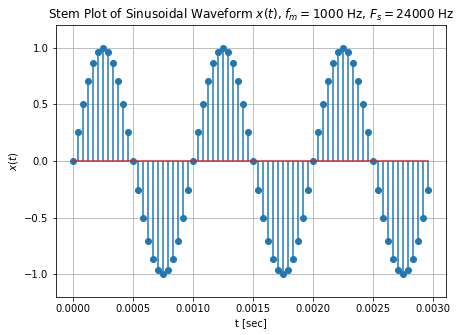

In [24]:
# make stem plot
plt.figure(1, figsize=fsz)
plt.stem(tt[:3 * 24], xt[:3 * 24], use_line_collection = True)
plt.ylim([-1.2, 1.2])
plt.ylabel('$x(t)$')
plt.xlabel('t [sec]')
strt1 = 'Stem Plot of Sinusoidal Waveform $x(t)$'
strt1 = strt1 + ', $f_m={}$ Hz, $F_s={}$ Hz'.format(fm, Fs)
plt.title(strt1)
plt.grid()
# plt.savefig('sine1000_Fs8000.eps')

<StemContainer object of 3 artists>

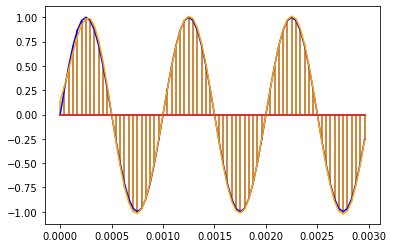

In [25]:
plt.stem(tt[:3 * 24], xt[:3 * 24], use_line_collection = True, linefmt = "blue", markerfmt = "blue")
plt.stem(ttN[:N*24], yNt[:N*24], use_line_collection = True, linefmt = "orange", markerfmt = "orange")

In [26]:
ttN.shape

(24000,)

In [27]:
tt.shape

(24000,)